In [91]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import sklearn
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler

from matplotlib.colors import ListedColormap

In [212]:
PPMI = pd.read_excel('/Users/lynaelhaffaf/Documents/PPMI.xlsx')

In [93]:
PPMI.head()

,Unnamed: 0,SITE,PATNO,APPRDX,EVENT_ID,age,age_cat,gen,EDUCYRS,educ,...,frontal_middle_rostral_FoldIndR_DK_x,frontal_superior_FoldIndR_DK_x,parietal_superior_FoldIndR_DK_x,temporal_superior_FoldIndR_DK_x,parietal_supramarginal_FoldIndR_DK_x,frontal_pole_FoldIndR_DK_x,temporal_pole_FoldIndR_DK_x,temporal_transverse_FoldIndR_DK_x,insula_FoldIndR_DK_x,eTIV_x
0,0,10,3000,2,BL,69.1397,3,2,18,2,...,127,112,101,50,69,16,7,4,34.0,1.561952e+06
1,1,10,3001,1,BL,65.1425,2,1,16,2,...,138,123,82,58,81,10,9,7,36.0,1.705960e+06
2,2,10,3002,1,BL,67.5781,3,2,16,2,...,93,76,79,42,55,6,13,3,29.0,1.353961e+06
3,3,10,3003,1,BL,56.7178,2,2,16,2,...,117,93,76,58,54,13,8,6,30.0,1.571106e+06
4,4,10,3004,2,BL,59.4137,2,1,16,2,...,90,97,91,49,88,13,9,5,39.0,1.614622e+06


In [213]:
roi = ['frontal_middle_caudal_ThickL_DK_x', 'occipital_cuneus_ThickL_DK_x', 'temporal_entorhinal_ThickL_DK_x', 'temporal_fusiform_ThickL_DK_x']
target = ['APPRDX']

# Separating out the ROI
x=PPMI.loc[:, roi].values

# Separating out the target
y=PPMI.loc[:, target].values

# Standardizing the ROI
x = StandardScaler().fit_transform(x)

In [214]:
#PCA projection in 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [196]:
principalDf

,principal component 1,principal component 2
0,0.695036,1.234033
1,0.284296,-0.942056
2,-2.062911,-0.887017
3,-1.367813,-0.491107
4,-1.008313,-0.255709
...,...,...
878,0.851270,2.135084
879,-0.183124,-0.277624
880,-0.276281,-0.021787
881,-0.276281,-0.021787


In [215]:
#combine the 2 PC with the target to get the final DataFrame
finalDf = pd.concat([principalDf, PPMI[target]], axis = 1)

In [184]:
print(finalDf)

     principal component 1  principal component 2  APPRDX
0                 0.695036               1.234033       2
1                 0.284296              -0.942056       1
2                -2.062911              -0.887017       1
3                -1.367813              -0.491107       1
4                -1.008313              -0.255709       2
..                     ...                    ...     ...
878               0.851270               2.135084       3
879              -0.183124              -0.277624       1
880              -0.276281              -0.021787       1
881              -0.276281              -0.021787       1
882               0.173671              -0.801238       2

[883 rows x 3 columns]


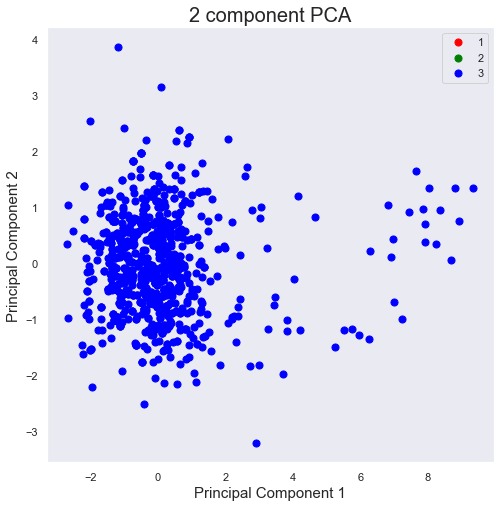

In [221]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['1', '2', '3']
colors = ['red', 'green', 'blue']
for finalDf['APPRDX'], color in zip(targets,colors):
    indicesToKeep = finalDf['APPRDX'] == PPMI.APPRDX
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [62]:
#When going from 4D to 2D you lose variance
#So we do explained_variance_ratio_
#if lower than 95% then it is not the best approach to use because lost too much variance
#Here is not a good way to visualize data because variance is lower than 95%
pca.explained_variance_ratio_

array([0.63821634, 0.1974565 ])

In [70]:
PPMI = pd.read_excel('/Users/lynaelhaffaf/Documents/PPMI.xlsx')

In [75]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(PPMI[roi], PPMI.APPRDX, test_size=1/7.0, random_state=0)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [78]:
#telling sklearn to choose the minimum number of PC such tht 95% of the variance is retained
pca.fit(X_train)

PCA(n_components=0.95)

In [80]:
pca.n_components_

4

In [81]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [82]:
#applying logistic regression to the transformed data 
from sklearn.linear_model import LogisticRegression

In [83]:
#Making an isntance model
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [84]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [85]:
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))

array([1])

In [86]:
# Predict for One Observation (image)
logisticRegr.predict(X_test[0:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [88]:
#Measuring Model Performance
logisticRegr.score(X_test, y_test)

0.7322834645669292